In [1]:
import pandas as pd
import numpy as np
import random
from glob import glob
import seaborn as sns
from matplotlib.colors import LogNorm
import matplotlib.pyplot as plt
from scipy import stats
from scipy import optimize

sns.set_theme('poster')
sns.axes_style({
    'axes.facecolor': 'white',
    'axes.edgecolor': 'black',
    'axes.grid': False,
    'axes.axisbelow': 'line',
    'axes.labelcolor': 'black',
    'figure.facecolor': 'white',
    'grid.color': '#b0b0b0',
    'grid.linestyle': '-',
    'text.color': 'black',
    'xtick.color': 'black',
    'ytick.color': 'black',
    'xtick.direction': 'out',
    'ytick.direction': 'out',
    'patch.edgecolor': 'black',
    'patch.force_edgecolor': False,
    'image.cmap': 'viridis',
    'font.family': ['sans-serif'],
    'font.sans-serif': ['DejaVu Sans',
     'Bitstream Vera Sans',
     'Computer Modern Sans Serif',
     'Lucida Grande',
     'Verdana',
     'Geneva',
     'Lucid',
     'Arial',
     'Helvetica',
     'Avant Garde',
     'sans-serif'],
    'xtick.bottom': True,
    'xtick.top': False,
    'ytick.left': True,
    'ytick.right': False,
    'axes.spines.left': True,
    'axes.spines.bottom': True,
    'axes.spines.right': True,
    'axes.spines.top': True
    })

{'axes.facecolor': 'white',
 'axes.edgecolor': 'black',
 'axes.grid': False,
 'axes.axisbelow': 'line',
 'axes.labelcolor': 'black',
 'figure.facecolor': 'white',
 'grid.color': '#b0b0b0',
 'grid.linestyle': '-',
 'text.color': 'black',
 'xtick.color': 'black',
 'ytick.color': 'black',
 'xtick.direction': 'out',
 'ytick.direction': 'out',
 'patch.edgecolor': 'black',
 'patch.force_edgecolor': False,
 'image.cmap': 'viridis',
 'font.family': ['sans-serif'],
 'font.sans-serif': ['DejaVu Sans',
  'Bitstream Vera Sans',
  'Computer Modern Sans Serif',
  'Lucida Grande',
  'Verdana',
  'Geneva',
  'Lucid',
  'Arial',
  'Helvetica',
  'Avant Garde',
  'sans-serif'],
 'xtick.bottom': True,
 'xtick.top': False,
 'ytick.left': True,
 'ytick.right': False,
 'axes.spines.left': True,
 'axes.spines.bottom': True,
 'axes.spines.right': True,
 'axes.spines.top': True}

In [2]:
file_paths = {
    '0-50 GeV' : sorted(glob('/scratch/rhillman/data/photonGun_E_0_50/BIB/*')),
    '50-250 GeV' : sorted(glob('/scratch/rhillman/data/photonGun_E_50_250/BIB/*')),
    '250-1000 GeV' : sorted(glob('/scratch/rhillman/data/photonGun_E_250_1000/BIB/*')),
    '1000-5000 GeV' : sorted(glob('/scratch/rhillman/data/photonGun_E_1000_5000/BIB/*'))
}

In [3]:
file = random.choice(file_paths['50-250 GeV'])
df = pd.read_parquet(file)

In [4]:
# df_filtered = df[df['E_GeV'] > 0.0017]

In [5]:
# fig, ax = plt.subplots(1, 1, figsize=(14, 6))

# plt.hist2d(df['z_mm'], df['x_mm'], weights=df['E_GeV'], bins=200, cmap='viridis', norm=LogNorm())
# # plt.hist2d(df['z_mm'], df['x_mm'], weights=df['E_GeV'], bins=200, cmap='afmhot')
# plt.title('Single 50-250 GeV photon')
# plt.xlabel('$z$ mm')
# plt.ylabel('$x$ mm')
# plt.colorbar(label='Energy (GeV)')
# plt.xlim(-2700, 2700)
# plt.ylim(-2700, 2700)
# ax.set_aspect('equal')
# plt.show()

In [6]:
def filtered(df, threshold):
    return df[df['E_GeV'] > threshold]

# def get_ROC_point(df, threshold):
#     bib_E_pre = df.loc[df['SIGNAL'] == False, 'E_GeV'].sum()
#     sig_E_pre = df.loc[df['SIGNAL'] == True, 'E_GeV'].sum()
    
#     df_filtered = filtered(df, threshold)
    
#     bib_E_post = df_filtered.loc[df_filtered['SIGNAL'] == False, 'E_GeV'].sum()
#     sig_E_post = df_filtered.loc[df_filtered['SIGNAL'] == True, 'E_GeV'].sum()

#     bib_efficiency = bib_E_post / bib_E_pre if bib_E_pre != 0 else 0
#     sig_efficiency = sig_E_post / sig_E_pre if sig_E_pre != 0 else 0

#     return threshold, sig_efficiency, bib_efficiency


In [7]:
# # Aggregating wrt cell ID
# grouped_df = df.groupby(['cell_id_0', 'cell_id_1']).agg({
#     'x_mm' : 'mean',
#     'y_mm' : 'mean',
#     'z_mm' : 'mean',
#     'E_GeV': 'sum',
#     't_ns': 'first',
#     'layer': 'first',
#     'SIGNAL': 'any'  # True if at least one hit is a signal
# }).reset_index()



# # Aggregating wrt position
# # grouped_df = df.groupby(['x_mm', 'y_mm', 'z_mm']).agg({
# #     'cell_id_0' : 'first',
# #     'cell_id_1' : 'first',
# #     'E_GeV': 'sum',
# #     't_ns': 'first',
# #     'layer': 'first',
# #     'SIGNAL': 'any'  # True if at least one hit is a signal
# # }).reset_index()

# # df:           3575871
# grouped_df #    2832672 by cell ID vs 2970992 by position non-truncated

In [8]:
# thresholds = []
# sig_efficiencies = []
# bib_efficiencies = []

# for threshold in np.logspace(-4, -1.5, 30):
#     threshold, bib_eff, sig_eff = get_ROC_point(grouped_df, threshold)
#     thresholds.append(threshold)
#     sig_efficiencies.append(sig_eff)
#     bib_efficiencies.append(bib_eff)

# efficiency_df = pd.DataFrame({
#     'threshold' : thresholds,
#     'sig_eff' : sig_efficiencies,
#     'bib_eff' : bib_efficiencies,
# })


# ideal_point = (1, 0)

# efficiency_df['euclidean_distance_to_ideal_efficiency'] = np.sqrt((efficiency_df['sig_eff'] - ideal_point[0])**2 + (efficiency_df['bib_eff'] - ideal_point[1])**2)

In [9]:
# min_distance_row = efficiency_df.loc[efficiency_df['euclidean_distance_to_ideal_efficiency'].idxmin()]
# min_distance_threshold = min_distance_row['threshold']
# min_distance_value = min_distance_row['euclidean_distance_to_ideal_efficiency']
# optimal_bib_efficiency = min_distance_row['bib_eff']
# optimal_sig_efficiency = min_distance_row['sig_eff']

# fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# sns.scatterplot(
#     data=efficiency_df, x="sig_eff", y="bib_eff", hue='threshold', 
#     legend=None, palette='Spectral', 
#     hue_norm=LogNorm(efficiency_df['threshold'].min(), efficiency_df['threshold'].max()), 
#     linewidth=0, ax=ax1
# )

# ax1.axvline(x=optimal_sig_efficiency, color='white', linestyle='--', alpha=0.5, label=f'Sig. eff: {optimal_sig_efficiency:.2f}')
# ax1.axhline(y=optimal_bib_efficiency, color='white', linestyle='--', alpha=0.5, label=f'BIB eff: {optimal_bib_efficiency:.2f}')

# ax1.set_xlim(0, 1)
# ax1.set_ylim(0, 1)
# ax1.set_aspect('equal', adjustable='box')
# ax1.set_xlabel('Signal Efficiency')
# ax1.set_ylabel('BIB Efficiency')

# ax1.text(0.01, optimal_bib_efficiency-0.01, f"{optimal_bib_efficiency:.2f}", horizontalalignment='left', verticalalignment='top', alpha=0.75)
# ax1.text(optimal_sig_efficiency-0.01, 1-0.01, f"{optimal_sig_efficiency:.2f}", horizontalalignment='right', verticalalignment='top', alpha=0.75)
# # ax1.legend(loc='upper left')

# norm = LogNorm(efficiency_df['threshold'].min(), efficiency_df['threshold'].max())
# sm = plt.cm.ScalarMappable(cmap="Spectral", norm=norm)
# sm.set_array([])
# cbar = plt.colorbar(sm, ax=ax1)
# cbar.set_label('Threshold (GeV)')

# sns.scatterplot(
#     data=efficiency_df, x='threshold', y='euclidean_distance_to_ideal_efficiency', 
#     palette='Spectral', hue='threshold', 
#     legend=None, hue_norm=LogNorm(efficiency_df['threshold'].min(), efficiency_df['threshold'].max()), 
#     linewidth=0, ax=ax2
# )

# ax2.set_ylabel('Euclidean Distance to Optimal Performance')
# ax2.set_ylim(-0.1, )
# ax2.axvline(x=min_distance_threshold, color='white', linestyle='--', label=f'Best Threshold: {min_distance_threshold*1000:.3f} MeV', alpha=0.5)

# ax2.legend(loc='lower right')

# ax2.set_xscale('log')
# ax2.set_xlabel('Threshold (GeV)')

# # Adjust layout
# plt.tight_layout()

# plt.show()

In [10]:
# Function to draw nested dodecagon
def draw_nested_dodecagon(center, radius_inner, radius_outer, num_vertices=12):
    vertices = []
    PI = np.pi

    # Define function to rotate points
    def rotate_points(points, angle):
        cos_angle = np.cos(angle)
        sin_angle = np.sin(angle)
        return [(center[0] + (x - center[0]) * cos_angle - (y - center[1]) * sin_angle,
                 center[1] + (x - center[0]) * sin_angle + (y - center[1]) * cos_angle) for x, y in points]

    for i in range(num_vertices):
        rotation = i * 2 * PI / num_vertices

        inner_vertices = [(center[0] + radius_inner * np.cos(rotation + 2 * PI * n / num_vertices),
                           center[1] + radius_inner * np.sin(rotation + 2 * PI * n / num_vertices))
                          for n in range(num_vertices)]
        outer_vertices = [(center[0] + radius_outer * np.cos(rotation + 2 * PI * n / num_vertices),
                           center[1] + radius_outer * np.sin(rotation + 2 * PI * n / num_vertices))
                          for n in range(num_vertices)]

        # Rotate entire wireframe by PI/12
        rotated_inner_vertices = rotate_points(inner_vertices, PI / 12)
        rotated_outer_vertices = rotate_points(outer_vertices, PI / 12)

        # Close the loop by repeating the first vertex at the end
        rotated_inner_vertices.append(rotated_inner_vertices[0])
        rotated_outer_vertices.append(rotated_outer_vertices[0])

        vertices.append((rotated_inner_vertices, rotated_outer_vertices))

    # Plotting nested dodecagon
    for inner, outer in vertices:
        inner_x, inner_y = zip(*inner)
        outer_x, outer_y = zip(*outer)
        ax.plot(inner_x, inner_y, color='black', linewidth=0.5, alpha=1)
        ax.plot(outer_x, outer_y, color='black', linewidth=0.5, alpha=1)

In [11]:
def aggregate(df):
    grouped_df = df.groupby(['cell_id_0', 'cell_id_1']).agg({
    'x_mm' : 'mean',
    'y_mm' : 'mean',
    'z_mm' : 'mean',
    'E_GeV': 'sum',
    't_ns': 'first',
    'layer': 'first',
    'SIGNAL': 'any'  # True if at least one hit is a signal
}).reset_index()
    return grouped_df

In [12]:
def get_mean_signal_position(df):
    signal_rows = df[df['SIGNAL'] == True]
    mean_x = signal_rows['x_mm'].mean()
    mean_y = signal_rows['y_mm'].mean()
    mean_z = signal_rows['z_mm'].mean()
    return mean_x, mean_y, mean_z

def get_cone(df, direction, spread_radians):
    direction = direction / np.linalg.norm(direction)
    dot_product = df[['x_mm', 'y_mm', 'z_mm']].values.dot(direction)
    magnitude = np.linalg.norm(df[['x_mm', 'y_mm', 'z_mm']].values, axis=1)
    cosine = dot_product / magnitude
    cosine_spread = np.cos(spread_radians)
    filtered_df = df[cosine >= cosine_spread]
    return filtered_df

def filtered(df, threshold):
    return df[df['E_GeV'] > threshold]

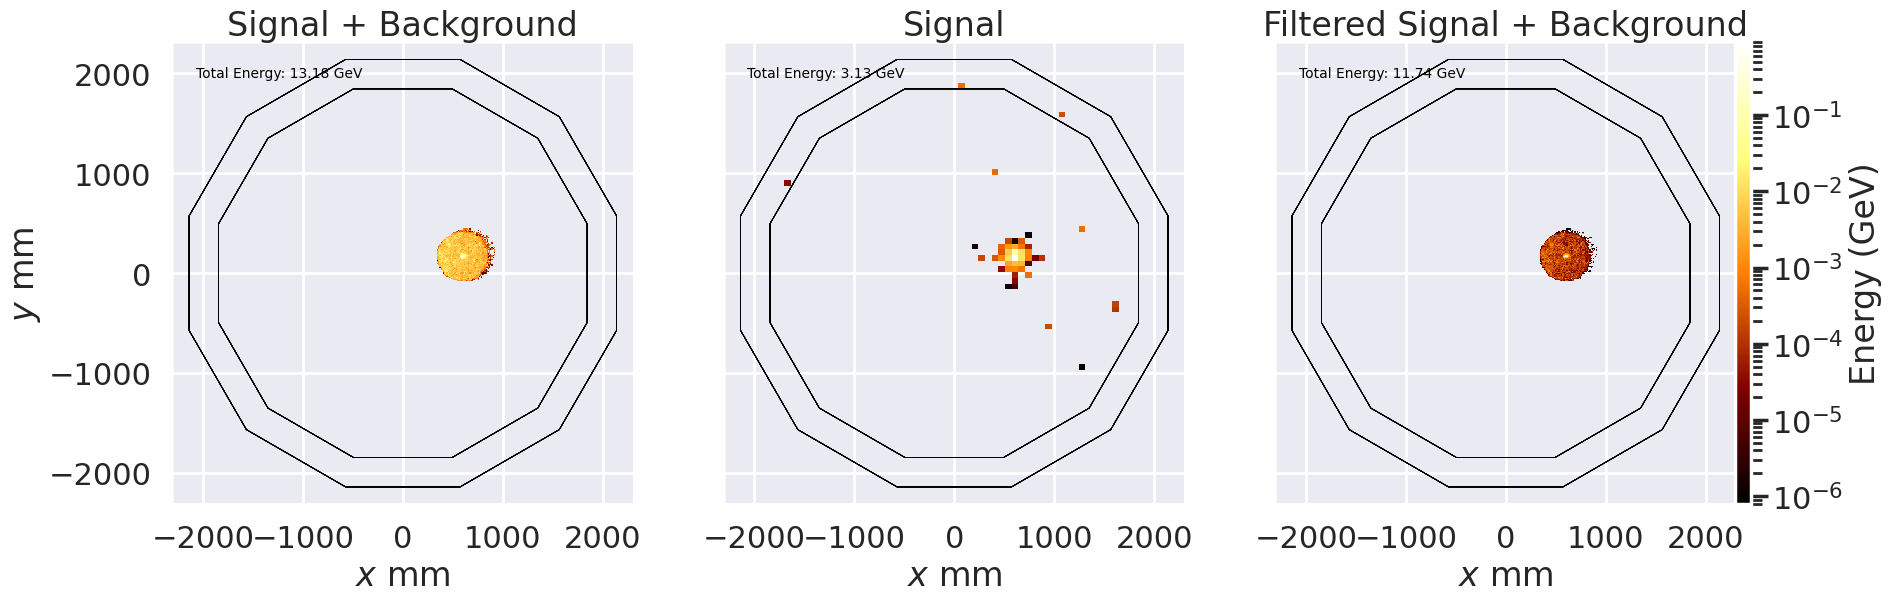

In [13]:
grouped_df = aggregate(df)

# Get data for each subplot
mean_position = get_mean_signal_position(grouped_df)
spread_radians = 0.1
conic_df1 = get_cone(grouped_df, mean_position, spread_radians)

mean_position_signal = get_mean_signal_position(grouped_df[grouped_df["SIGNAL"] == True])
df2 = grouped_df[grouped_df["SIGNAL"] == True]

conic_df3 = filtered(conic_df1, 0.000197)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(21, 6), sharex=True, sharey=True)

# Plot 1
im1 = axes[0].hist2d(conic_df1['x_mm'], conic_df1['y_mm'], weights=conic_df1['E_GeV'], bins=50, cmap='afmhot', norm=LogNorm())
axes[0].set_title('Signal + Background')
axes[0].set_xlabel('$x$ mm')
axes[0].set_ylabel('$y$ mm')
total_energy1 = conic_df1['E_GeV'].sum()
axes[0].annotate(f'Total Energy: {total_energy1:.2f} GeV', xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize=10, color='black')

# Plot 2
im2 = axes[1].hist2d(df2['x_mm'], df2['y_mm'], weights=df2['E_GeV'], bins=50, cmap='afmhot', norm=LogNorm())
axes[1].set_title('Signal')
axes[1].set_xlabel('$x$ mm')
total_energy2 = df2['E_GeV'].sum()
axes[1].annotate(f'Total Energy: {total_energy2:.2f} GeV', xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize=10, color='black')

# Plot 3
im3 = axes[2].hist2d(conic_df3['x_mm'], conic_df3['y_mm'], weights=conic_df3['E_GeV'], bins=50, cmap='afmhot', norm=LogNorm())
axes[2].set_title('Filtered Signal + Background')
axes[2].set_xlabel('$x$ mm')
total_energy3 = conic_df3['E_GeV'].sum()
axes[2].annotate(f'Total Energy: {total_energy3:.2f} GeV', xy=(0.05, 0.95), xycoords='axes fraction', ha='left', va='top', fontsize=10, color='black')

# Adjusting common features
for ax in axes:
    ax.set_xlim(-2300, 2300)
    ax.set_ylim(-2300, 2300)
    ax.set_aspect('equal')
    ax.spines['top'].set_linewidth(0.5)
    ax.spines['right'].set_linewidth(0.5)
    ax.spines['bottom'].set_linewidth(0.5)
    ax.spines['left'].set_linewidth(0.5)
    ax.tick_params(width=0.5)

# Add a colorbar for all plots
cbar = fig.colorbar(im1[3], ax=axes, orientation='vertical', fraction=0.04, pad=0, aspect=30)
cbar.set_label('Energy (GeV)')

# Assuming draw_nested_dodecagon is a predefined function
center = [0, 0]
radius_inner = 1910
radius_outer = 2215
for ax in axes:
    draw_nested_dodecagon(center, radius_inner, radius_outer)

plt.show()

In [14]:
# bib_hits = df[df['SIGNAL'] == False]
# min_energy = bib_hits['E_GeV'].min()
# max_energy = bib_hits['E_GeV'].max()
# bins = np.logspace(np.log10(min_energy), np.log10(max_energy), num=100)

# counts, edges, _ = plt.hist(bib_hits['E_GeV'], bins=bins)
# plt.xscale('log')
# plt.xlabel('Energy (GeV)')
# plt.ylabel('Counts')
# plt.title('Energy Spectrum of BIB Hits')

# peak_index = np.argmax(counts)
# peak_energy = (edges[peak_index] + edges[peak_index + 1]) / 2

# plt.annotate(f'Peak Energy: {peak_energy:.2e} GeV', 
#              xy=(peak_energy, counts[peak_index]), 
#              xytext=(peak_energy, counts[peak_index] * 1.5),
#              arrowprops=dict(facecolor='black', arrowstyle='->'),
#              fontsize=10, ha='center')

In [15]:
def get_events(n: int, energy: str):
    dataframes = []
    for i in range(n):
        file = file_paths[energy][i]
        df = pd.read_parquet(file)
        dataframes.append(df)
    return dataframes

def get_events_aggregated(n: int, energy:str):
    events = get_events(n, energy)
    events = [aggregate(event) for event in events]
    return events

In [16]:
# def calculate_energies(event, threshold=0.01):
    
#     # Aggregate event data
#     event = aggregate(event)
    
#     # Calculate true energy
#     true_energy = event[event['SIGNAL'] == True]['E_GeV'].sum()
    
#     # Filter and calculate reconstructed energy
#     filtered_event = filtered(cone_of_shame(event, get_mean_signal_position(event), 0.1), threshold)
#     reco_energy = filtered_event['E_GeV'].sum()
    
#     # Calculate fractional difference
#     fractional = (reco_energy - true_energy) / true_energy
    
#     return true_energy, reco_energy, fractional

# # Process all events in one go with a specific threshold
# threshold_value = 0.01  # Set your desired threshold value here
# events = get_events(100, '0-50 GeV')
# results = [calculate_energies(event, threshold=threshold_value) for event in events]

# # Create the DataFrame
# event_energies = pd.DataFrame(results, columns=['True', 'Reco', 'Fractional'])

# # Display the DataFrame
# print(event_energies)

In [17]:
# def add_fit_to_histplot(a, fit=stats.norm, ax=None, outlier_threshold=1):
#     if ax is None:
#         ax = plt.gca()
    
#     # Compute outlier thresholds
#     Q1, Q3 = np.percentile(a, [25, 75])
#     IQR = Q3 - Q1
#     lower_bound = Q1 - outlier_threshold * IQR
#     upper_bound = Q3 + outlier_threshold * IQR

#     # Filter out outliers
#     filtered_a = a[(a >= lower_bound) & (a <= upper_bound)]
    
#     # Compute bandwidth
#     bw = len(filtered_a)**(-1/5) * filtered_a.std(ddof=1)
    
#     # Initialize PDF support
#     x = np.linspace(filtered_a.min() - bw*3, filtered_a.max() + bw*3, 200)
    
#     # Compute PDF parameters
#     params = fit.fit(filtered_a)
    
#     # Compute PDF values
#     y = fit.pdf(x, *params)
    
#     # Plot the fitted continuous distribution
#     ax.plot(x, y, color='red')
#     return ax

In [18]:
# # Create the histogram plot
# plt.figure(figsize=(10, 6))

# # Set x-axis limits
# xmin = -1
# xmax = 1
# plt.xlim(xmin, xmax)

# # Plot histogram manually
# plt.hist(event_energies['Fractional'], bins=300, density=True, color='skyblue', edgecolor='white', alpha=1)

# # Plot Gaussian fit
# add_fit_to_histplot(event_energies['Fractional'], outlier_threshold=1)

# # Add labels and title
# plt.xlabel('(E_reco-E_true)/E_true')
# plt.ylabel('Counts')
# plt.title('Energy Resolution, 0-50 GeV Photons')

# plt.show()

In [19]:
def cone_of_shame(df, direction, spread_radians):
    direction = direction / np.linalg.norm(direction)
    dot_product = df[['x_mm', 'y_mm', 'z_mm']].values.dot(direction)
    magnitude = np.linalg.norm(df[['x_mm', 'y_mm', 'z_mm']].values, axis=1)
    cosine = dot_product / magnitude
    cosine_spread = np.cos(spread_radians)
    filtered_df = df[cosine >= cosine_spread]
    return filtered_df

In [20]:
def calculate_energies(event, threshold=0.01):
    # Calculate target energy: get cone and then sum all energies with "SIGNAL" == True in that cone.
    cone = get_cone(event, get_mean_signal_position(event), 0.1)
    signal_cone = cone[cone['SIGNAL'] == True]
    
    if signal_cone.empty == False:
        target_energy = signal_cone['E_GeV'].sum()
    
    # Filter and calculate reconstructed energy
    filtered_cone = filtered(cone, threshold)
    reco_energy = filtered_cone['E_GeV'].sum()
    
    # Calculate fractional difference
    response = reco_energy  / target_energy
    
    return target_energy, reco_energy, response

In [21]:
def overlay_cone(direction, spread_radians, length):
    direction = direction / np.linalg.norm(direction)
    dot_product = df[['x_mm', 'y_mm']].values.dot(direction)

In [22]:
# sns.set_style('ticks')

# # max_z = df[df['SIGNAL'] == True]['z_mm'].max()
# # min_z = df[df['SIGNAL'] == True]['z_mm'].min()

# # Generate joint grid
# p = sns.JointGrid(data=grouped_df, x='x_mm', y='y_mm', hue='SIGNAL')

# bins = 200
# # Plot main hist
# p.plot_joint(
#     sns.histplot, pmax=.8, weights=grouped_df['E_GeV'], bins=bins, palette=['black', '#DA291C'], legend=None
# )

# # Plot secondary hists
# p.plot_marginals(sns.histplot, multiple='stack', element="step", palette=['black', '#DA291C'], bins=bins)
# p.set_axis_labels('$x$ mm', '$y$ mm')
# p.fig.set_size_inches(8, 8)

In [23]:
# sns.set_style('ticks')

# mean_position = get_mean_signal_position(grouped_df)
# spread_radians = 0.1
# cone = get_cone(grouped_df, mean_position, spread_radians)

# # Generate joint grid
# p = sns.JointGrid(data=cone, x='x_mm', y='y_mm', hue='SIGNAL')

# bins = 70
# # Plot main hist
# p.plot_joint(
#     sns.histplot, pmax=.8, weights=cone['E_GeV'], bins=bins, palette=['black', '#DA291C'], legend=None
# )

# # Plot secondary hists
# p.plot_marginals(sns.histplot, multiple='stack', element="step", palette=['black', '#DA291C'], bins=bins)
# p.set_axis_labels('$x$ mm', '$y$ mm')
# p.fig.set_size_inches(8, 8)

In [24]:
# e = cone[cone['SIGNAL'] == True]['E_GeV'].sum()
# print(e*35)

In [25]:
events = get_events_aggregated(300, '0-50 GeV')

Number of bins: 15091


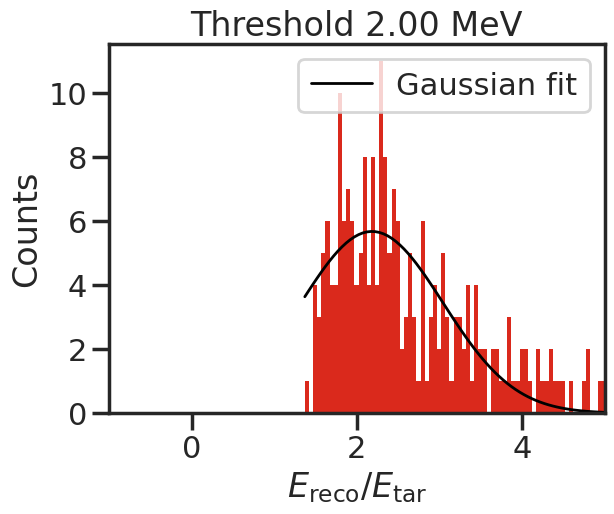

Number of bins: 11477


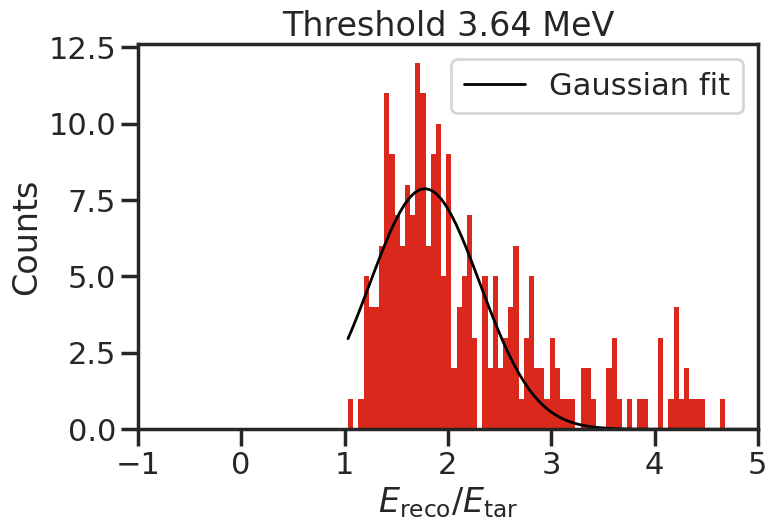

Number of bins: 9065


/home/rhillman/.local/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


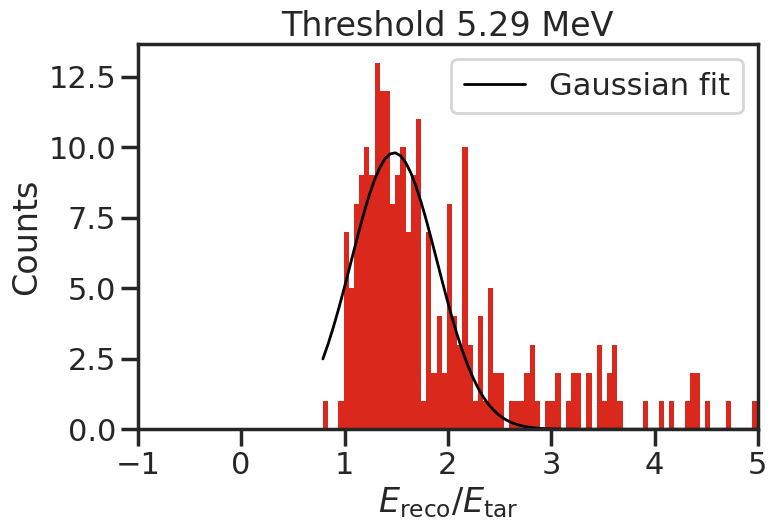

Number of bins: 6922


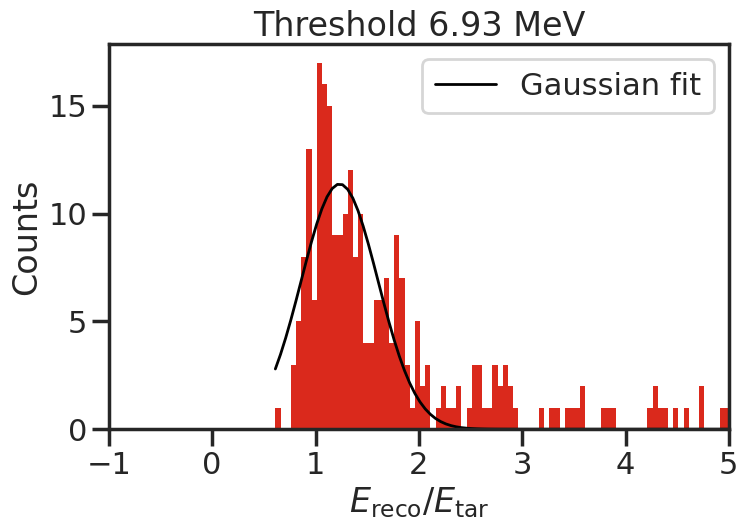

Number of bins: 5397


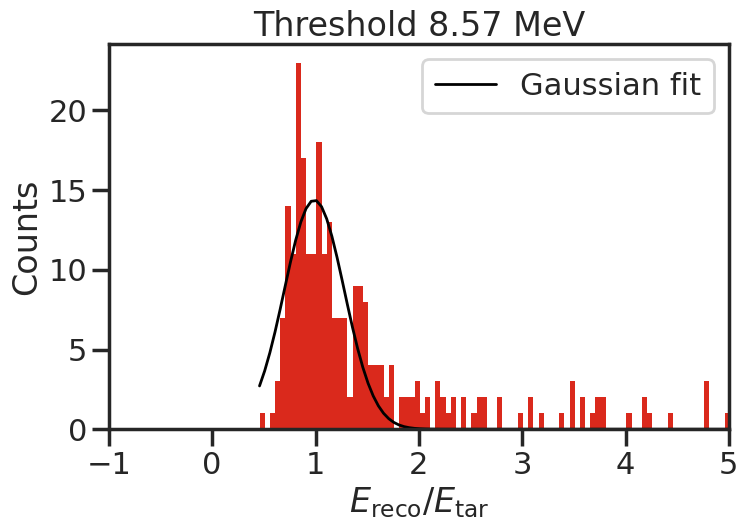

Number of bins: 3768


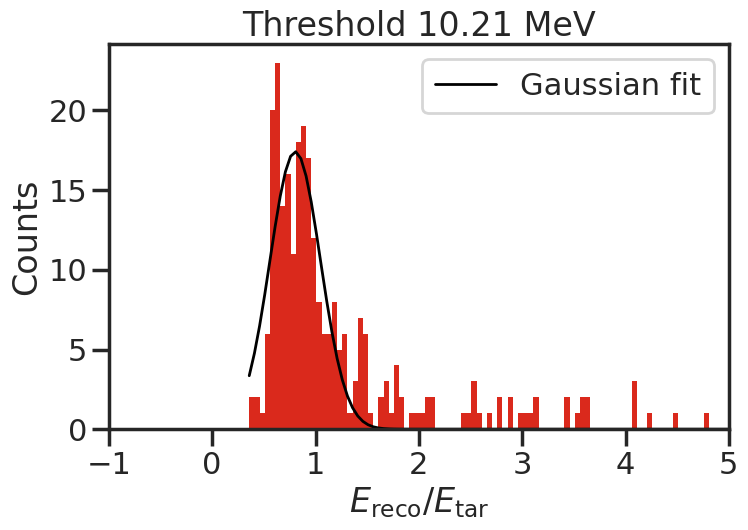

Number of bins: 2844


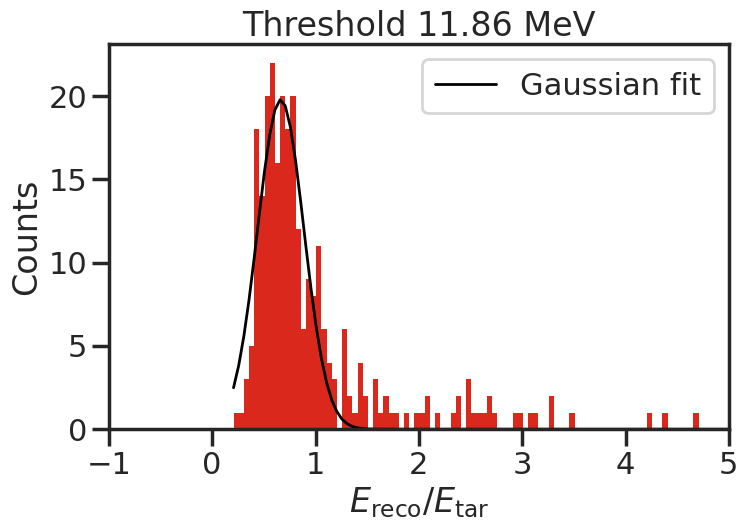

Number of bins: 2083


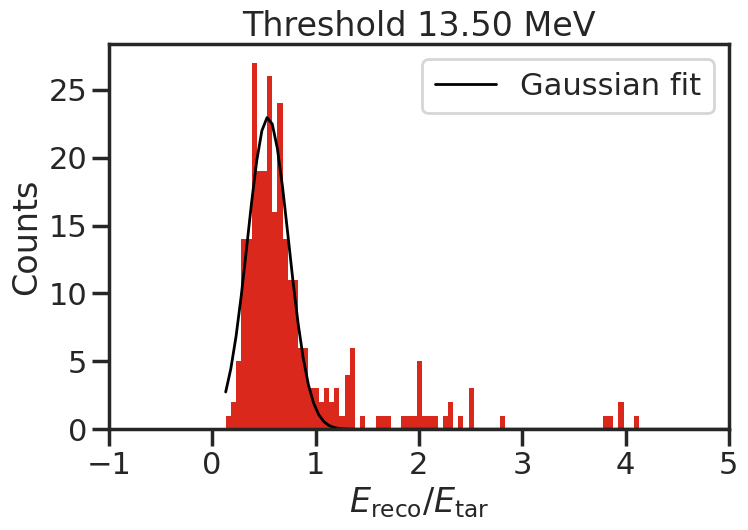

Number of bins: 1620


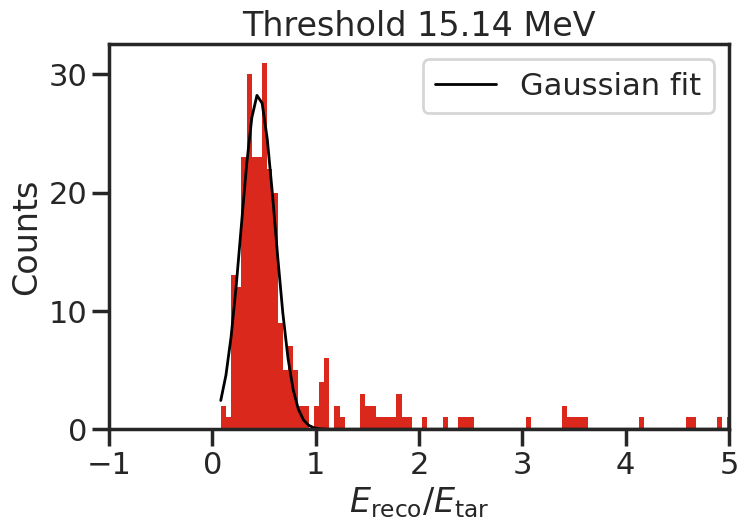

Number of bins: 1372


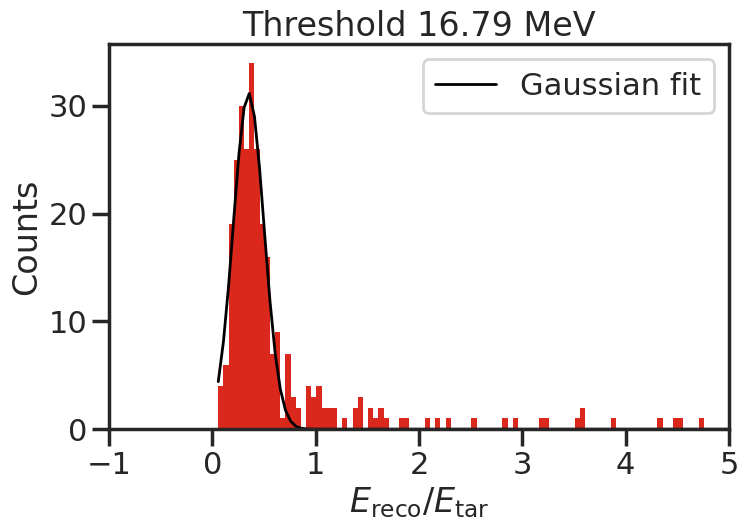

Number of bins: 1372


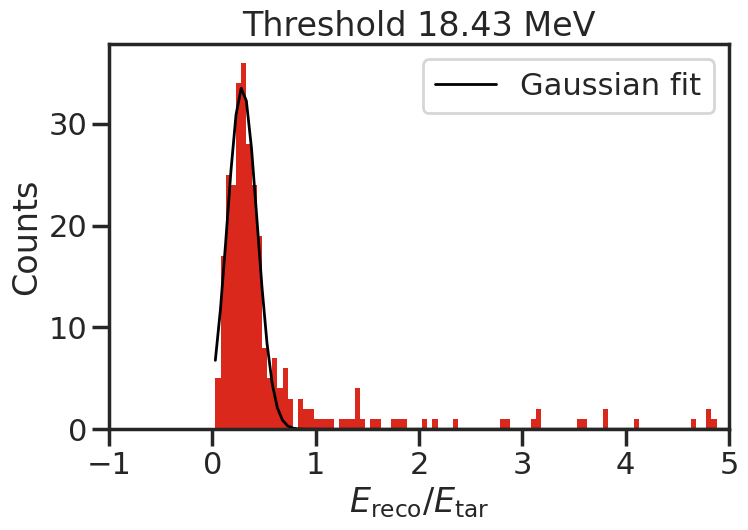

Number of bins: 1167


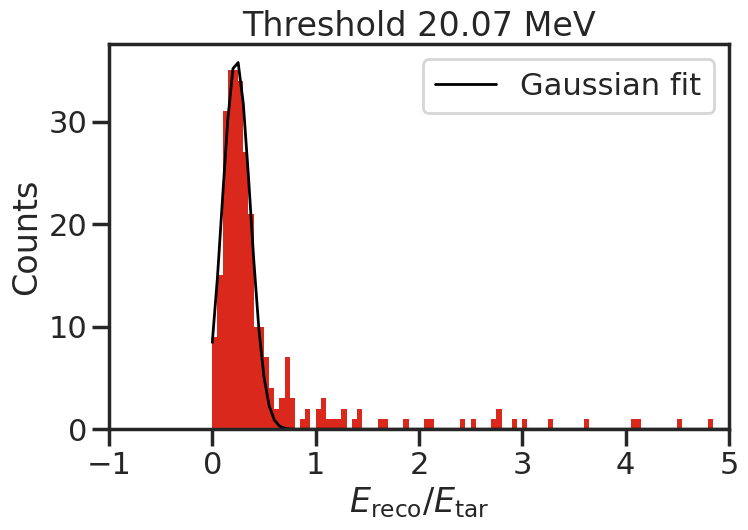

Number of bins: 1053


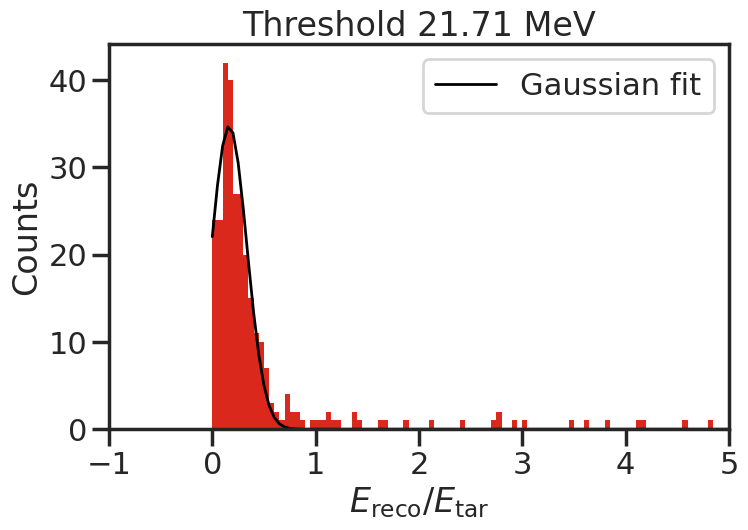

Number of bins: 696


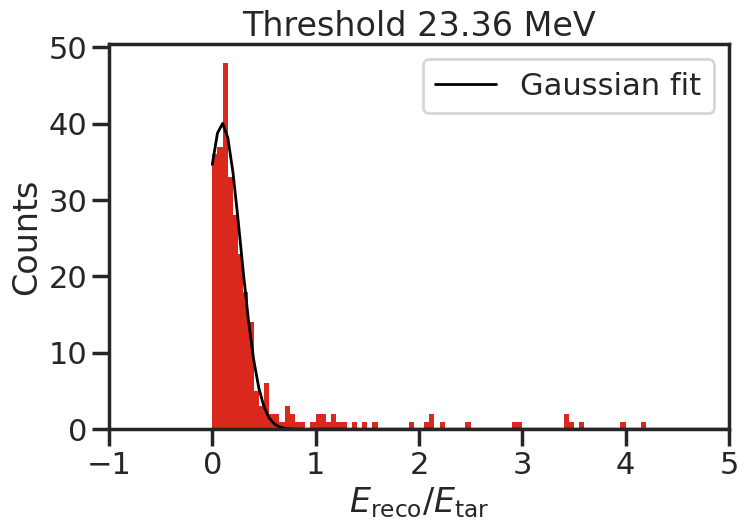

Number of bins: 692


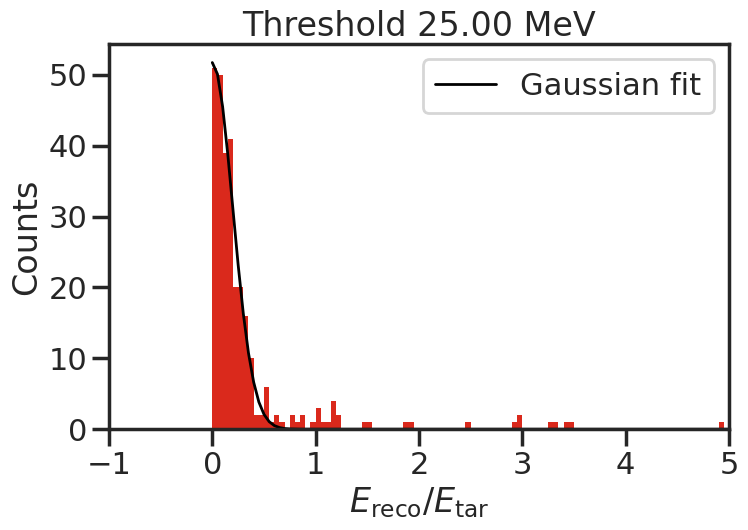

In [26]:
sns.set_style('ticks')

thresholds = np.linspace(0.002, 0.025, 15)

means = []
std_devs = []
uncs = []

x_lim = (-1, 5)

def process_data(threshold):
    results = [calculate_energies(event, threshold=threshold) for event in events]
    event_energies = pd.DataFrame(results, columns=['Target E', 'Reconstructed E', 'Response'])
    return event_energies

event_energies_list = [process_data(threshold) for threshold in thresholds] # List of dataframes containing three columns

def gaussian(x, a, b, c):
    return a * np.exp(-(x - b)**2 / (2 * c**2))

binwidth = 0.05

for i, (event_energies, threshold) in enumerate(zip(event_energies_list, thresholds)):

    # plot hist
    n, bin_edges, patches = plt.hist(
        event_energies['Response'], 
        bins=np.arange(min(event_energies['Response']), 
                       max(event_energies['Response']) + binwidth, binwidth), 
        color='#DA291C', 
        edgecolor='white',
        linewidth=0
        )
    
    # get bin centers to pass to curve fitter
    bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2
    n_bins = len(bin_centers)
    print(f"Number of bins: {n_bins}")

    try:
        # fit curve
        popt, pcov = optimize.curve_fit(
            gaussian, 
            xdata=bin_centers, 
            ydata=n, 
            bounds=(
                (0, 0, 0.01), 
                (500, 10, 10)
                ), 
            p0=(1, 0, .5), 
            maxfev=20000
            )
        perr = np.sqrt(np.diag(pcov))
        a_opt, b_opt, c_opt = popt # a=amp, b=mean, c=stddev

        # store the results for the next cell
        means.append(b_opt)
        std_devs.append(c_opt)
        uncs.append(perr)

        # Generate values for the fitted curve
        x_fit = np.linspace(bin_edges[0], bin_edges[-1], n_bins) # first through last bin
        y_fit = gaussian(x_fit, *popt)

        # Plot the fitted Gaussian curve
        plt.plot(x_fit, y_fit, color='black', linewidth=2, label='Gaussian fit')
    except:
        print("Insufficient data to fit.")

    # Set plot parameters
    plt.rcParams["figure.figsize"] = (8, 5)
    plt.xlabel(r'$E_{\mathrm{reco}} / E_{\mathrm{tar}}$')
    plt.ylabel('Counts')
    plt.xlim(x_lim)
    plt.title(f'Threshold {threshold*1000:.2f} MeV')
    plt.legend()
    
    # Display the plot
    plt.show()

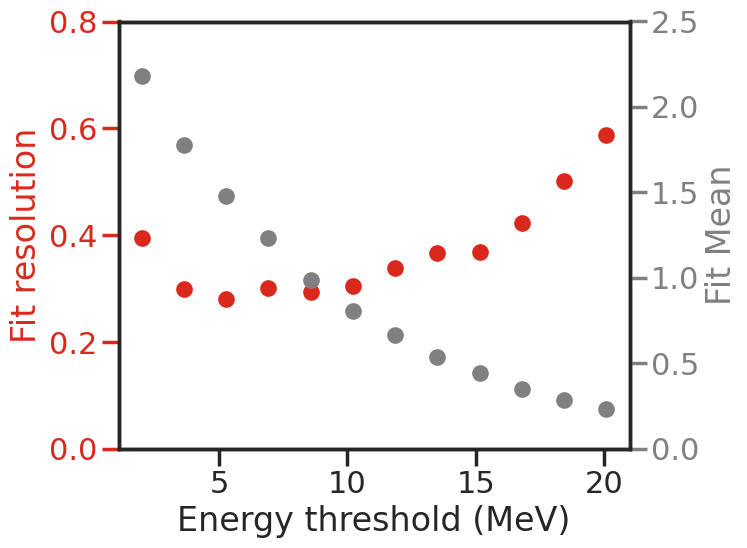

In [53]:
sns.set_style('ticks')

# plt.rcParams['errorbar.capsize'] = 4

# Plot energy resolution vs. threshold
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6), tight_layout=True)

ax2 = ax1.twinx()
ax2.scatter(
    x=thresholds[0:-3]*1000,
    y=means[0:-3],
    marker='o',
    linewidth=0,
    color='gray'
)
ax2.set_ylim(0, 2.5)
ax2.set_ylabel('Fit Mean', color='gray')
ax2.tick_params(axis='y', color='gray', labelcolor='gray')

ax1.scatter(
    x=thresholds[0:-3]*1000, 
    y= [std_dev / mean for std_dev, mean in zip(std_devs[0:-3], means[0:-3])],
    marker='o',  
    linewidth=0, 
    color='#DA291C'
    )
ax1.set_ylim(0, 0.8)
ax1.set_ylabel('Fit resolution', color='#DA291C')
ax1.set_xlabel('Energy threshold (MeV)')
ax1.tick_params(axis='y', color='#DA291C', labelcolor='#DA291C')


# sns.despine()
plt.show()

KeysView(RcParams({'_internal.classic_mode': False,
          'agg.path.chunksize': 0,
          'animation.bitrate': -1,
          'animation.codec': 'h264',
          'animation.convert_args': ['-layers', 'OptimizePlus'],
          'animation.convert_path': 'convert',
          'animation.embed_limit': 20.0,
          'animation.ffmpeg_args': [],
          'animation.ffmpeg_path': 'ffmpeg',
          'animation.frame_format': 'png',
          'animation.html': 'none',
          'animation.writer': 'ffmpeg',
          'axes.autolimit_mode': 'data',
          'axes.axisbelow': True,
          'axes.edgecolor': '.15',
          'axes.facecolor': 'white',
          'axes.formatter.limits': [-5, 6],
          'axes.formatter.min_exponent': 0,
          'axes.formatter.offset_threshold': 4,
          'axes.formatter.use_locale': False,
          'axes.formatter.use_mathtext': False,
          'axes.formatter.useoffset': True,
          'axes.grid': False,
          'axes.grid.axis': 'both'

In [29]:
# sns.set_style('ticks')

# # Initialize storage for results
# means = []
# std_devs = []

# # Retrieve events and calculate max energy
# events = get_events(50, '0-50 GeV')
# max_E = sorted([event['E_GeV'].max() for event in events])[0]

# # Define thresholds and plot limits
# thresholds = np.linspace(0, .02, 15)
# x_lim = (-1, 5)
# binwidth = .025

# # Set plotting parameters
# plt.rcParams["figure.figsize"] = (8, 5)

# # Process each threshold
# for i, threshold in enumerate(thresholds):
#     event_energies = process_data(threshold)
    
#     # Histogram calculation
#     fractional_energies = event_energies['Fractional']
#     min_energy, max_energy = min(fractional_energies), max(fractional_energies)
#     bins = np.arange(min_energy, max_energy + binwidth, binwidth)
#     n, bin_edges, _ = plt.hist(fractional_energies, bins=bins, color='#DA291C', edgecolor='white', linewidth=0)
#     bin_centers = (bin_edges[:-1] + bin_edges[1:]) / 2

#     # Fit Gaussian
#     popt, pcov = optimize.curve_fit(
#         gaussian, 
#         xdata=bin_centers, 
#         ydata=n, 
#         bounds=((-np.inf, -10, 0.0001), (np.inf, 10, 50)), 
#         p0=(1, 0, 1), # amplitude, bias, std dev.
#         maxfev=800
#         )
    
#     a_opt, b_opt, c_opt = popt

#     # Store the results
#     means.append(b_opt)
#     std_devs.append(c_opt)

#     # Plot Gaussian fit
#     x_fit = np.linspace(bin_edges[0], bin_edges[-1], len(bin_edges-1))
#     y_fit = gaussian(x_fit, *popt)
#     plt.plot(x_fit, y_fit, color='black', linewidth=2, label='Gaussian fit')

#     # Set plot parameters and display
#     plt.xlabel(r'$\left(E_{\mathrm{reco}} - E_{\mathrm{tar}} \right) / E_{\mathrm{tar}}$')
#     plt.ylabel('Counts')
#     plt.xlim(x_lim)
#     plt.title(f'Threshold {threshold*1000:.2f} MeV')
#     plt.legend()
#     plt.show()

In [30]:
# sns.set_style('ticks')

# # Plot energy resolution vs. threshold
# plt.figure(figsize=(8, 6))
# sns.scatterplot(x=thresholds*1000, y=std_devs, marker='o', legend=None, linewidth=0, color='#DA291C')
# sns.despine()
# # plt.ylim(0, 2)
# plt.xlabel('Threshold (MeV)')
# plt.ylabel('Energy Resolution (Std Dev)')
# # plt.title('Energy Resolution vs. Threshold')
# plt.show()